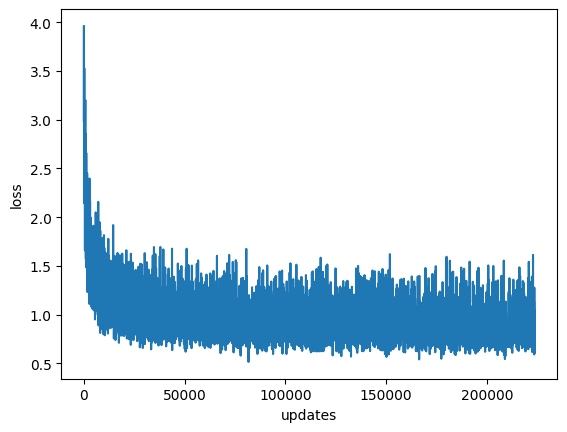

In [4]:
import regex as re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  


def extract_pattern(s):  
    pattern = r'train-([0-9]+)-([0-9]+) : (.*)'  
    match = re.findall(pattern,s) 
    if len(match) > 0:  
        return match[0]
    else:  
        return None  
filename = "/home/v-xingwuchen/gpt/log/TinyStories-8M.log"
loss_all = []
updates_all = []
with open(filename,"r+") as f:
    for line in f:
        result = extract_pattern(line)
        if result is not None:
            _, updates, loss = result
            loss_all.append(float(loss))
            updates_all.append(int(updates))

data = pd.DataFrame.from_dict(
    {
        "loss" : loss_all,
        "updates" : updates_all
    }
)
sns.lineplot(data=data, x="updates", y="loss")
plt.show()
 
